# HW3:  Part II

In class, we extracted player passing data for the 2018 regular season from http://www.nfl.com/stats/categorystats?tabSeq=0&season=2018&seasonType=REG&statisticCategory=PASSING&d-447263-p=1

We created a pandas dataframe of the player's name, team url, position, completions, attempts, yards, and touchdowns.

Run the following 4 cells before beginning the homework questions.

In [ ]:
# import the libraries we need
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# have url hold the website's url
url = "http://www.nfl.com/stats/categorystats?tabSeq=0&season=2018&seasonType=REG&statisticCategory=PASSING&d-447263-p=1"

# Query the website and return the html to the variable 'website'
website = requests.get(url)

# Parse the html in the 'website' variable, and store it in a 
# beautiful soup form
soup = BeautifulSoup(website.content, 'html.parser')

# Let's find all the event-group classes on the webpage
player_list = soup.find_all('tr')
player_list = player_list[1:]

In [ ]:
passing_2018stats = []

for player in player_list:
    playerCols = player.find_all('td')
    colDict = {}
    # Name
    colDict['name'] = playerCols[1].find('a').get_text()
    # Team URL
    colDict['teamURL'] = playerCols[2].find('a')['href']
    # Position
    colDict['position'] = playerCols[3].get_text()
    # Completions
    colDict['completions'] = playerCols[4].get_text().strip()
    # Attempts
    colDict['attempts'] = playerCols[5].get_text().strip()
    # Yards
    colDict['yards'] = playerCols[8].get_text().strip()
    # Touchdowns
    colDict['TDs'] = playerCols[11].get_text().strip()
    passing_2018stats.append(colDict)

In [ ]:
playerdf = pd.DataFrame(passing_2018stats)
playerdf.head()

## Question 1:
You may have noticed that there are actually 3 pages of data and we only extracted the first page of data.  That is, above the "Passing" banner on the nfl stats page, there is an option to click to page 1, 2, or 3.  
  
Using the code from class, adjust accordingly so that you have a dataframe that contains all the player from all three pages.  Print the tail of the pandas dataframe. 
  
Hint:  the url from page to page only differs by one number and using a $\texttt{for}$ loop (with the $\texttt{range}$ function) may be helpful)

In [ ]:
'''YOUR CODE HERE'''

passingdf.tail()

## Question 2:
Webscraping can be very tedious and it's easy to overlook things.  It's always a good idea to crosscheck the data you are scraping against the website to make sure you are getting exactly what you think you are.  
  
If you look at page 3 of the passing stats page on nfl.com (http://www.nfl.com/stats/categorystats?tabSeq=0&season=2018&seasonType=REG&statisticCategory=PASSING&d-447263-p=3), you'll notice that Dede Westbrook is the last entry and seemily player 93.  Does this match the number of players in your $\texttt{passingdf}$?  Explain.

#### YOUR RESPONSE HERE

## Question 3:
Save the pandas dataframe to a csv file called passingDF. 
You may use the following as a resource:  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html

In [ ]:
'''YOUR CODE HERE'''

## Question 4:
Recall that in this dataframe, we saved the team url for each player:

In [ ]:
urls = passingdf['teamURL']
urls[:9]

We'll use these urls to visit each team's page in order to extract team statistics and make a $\texttt{teamdf}$.  We'll walk you through some the beginning of the code, and you'll have to finish it.

Start by visiting the NY Giant's url:  http://www.nfl.com/teams/newyorkgiants/profile?team=NYG

This is the same website that you would be directed to if you click on the hyperlink next to Eli Manning's name on our passing stats page.  Notice teamURL that you scraped is only part of the url -- you must concatenate "http://www.nfl.com" to the beginning of the url from above to actually get the full url. 

In [ ]:
url = "http://www.nfl.com" + passingdf['teamURL'][8]
url

Great!  But, we aren't interested in scraping data from this page -- instead we'll scrape data from the team's stats page.  To navigate there, click on the "Stats" -- the url becomes http://www.nfl.com/teams/newyorkgiants/statistics?team=NYG

Notice that the only difference between the two urls is "profile" and "statistics"

In [ ]:
url = url.replace('profile', 'statistics')
url

Now we can make a $\texttt{beatuifulSoup}$ object as before.

In [ ]:
website = requests.get(url)
soup = BeautifulSoup(website.content, 'html.parser')
soup

We will extract ALL of the team statistics (Total First Downs, ..., Turnover Ratio).  $\textbf{Don't worry about saving the Opponent's column, just the Giant's column.}$

We'll start by finding the html tag that brings us to the team statics:

In [ ]:
table = soup.find("table")
table

Great!  Notice that each row is saved in a 'tr' tag.  It is your job to translate each row $\textbf{(just the team's column NOT the opponent's column)}$ into a dictionary whose keys are the row names (i.e. Total First Downs, 1st Downs, 2nd Downs, etc.)  So ultimately, the NYG's dictionary should look like this:

{'(Rush-Pass-Ret-Def)': '13 - 23 - 0 - 3',}  $
  '1st Downs (Rush-Pass-By Penalty)': '71 - 208 - 18',  
  '3rd Down Conversions': '76/206',
  '4th Down Conversions': '12/20',
  'Field Goals': '32/33',
  'Offense (Plays-Avg Yds)': '984 - 5.8',
  'Passing (Comp-Att-Int-Avg)': '382 - 583 - 12 - 7.6',
  'Rushing (Plays-Avg Yards)': '354 - 4.7',
  'Sacks': '30',
  'Time of Possession': '28:56',
  'Total First Downs': '297',
  'Total Offensive Yds': '5697',
  'Total Passing Yds': '4047',
  'Total Rushing Yds': '1650',
  'Touchdowns': '39',
  'Turnover Ratio': '+2',
  'team': 'newyorkgiants'}
 
Notice that we added 'team': 'newyorkgiants', so we know this dictionary belongs to the NY Giants.  

$\textbf{We recommend you figure out how to make the dictionary for the New York Giants, as shown above, before moving on.}$

In [ ]:
'''YOUR CODE HERE'''

You will need to make a dictionary for each team (there are 32 total NFL teams).  Here's some skeleton code to get you started.  The rest is up to you.

Note: running this code may take 2-3 minutes.  Be patient -- seeing $\texttt{In[*]}$ means your code is running!

In [ ]:
teamList = []

for url in urls:
    teamName = url.split("/")[2]
    url = "http://www.nfl.com" + url
    url = url.replace("profile", "statistics")
    website = requests.get(url)
    soup = BeautifulSoup(website.content, 'html.parser')
    table = soup.find("table")
    '''YOUR CODE HERE'''
    
teamdf = pd.DataFrame(teamList)
teamdf.head()

If you do this correctly, your dataframe should look like this:

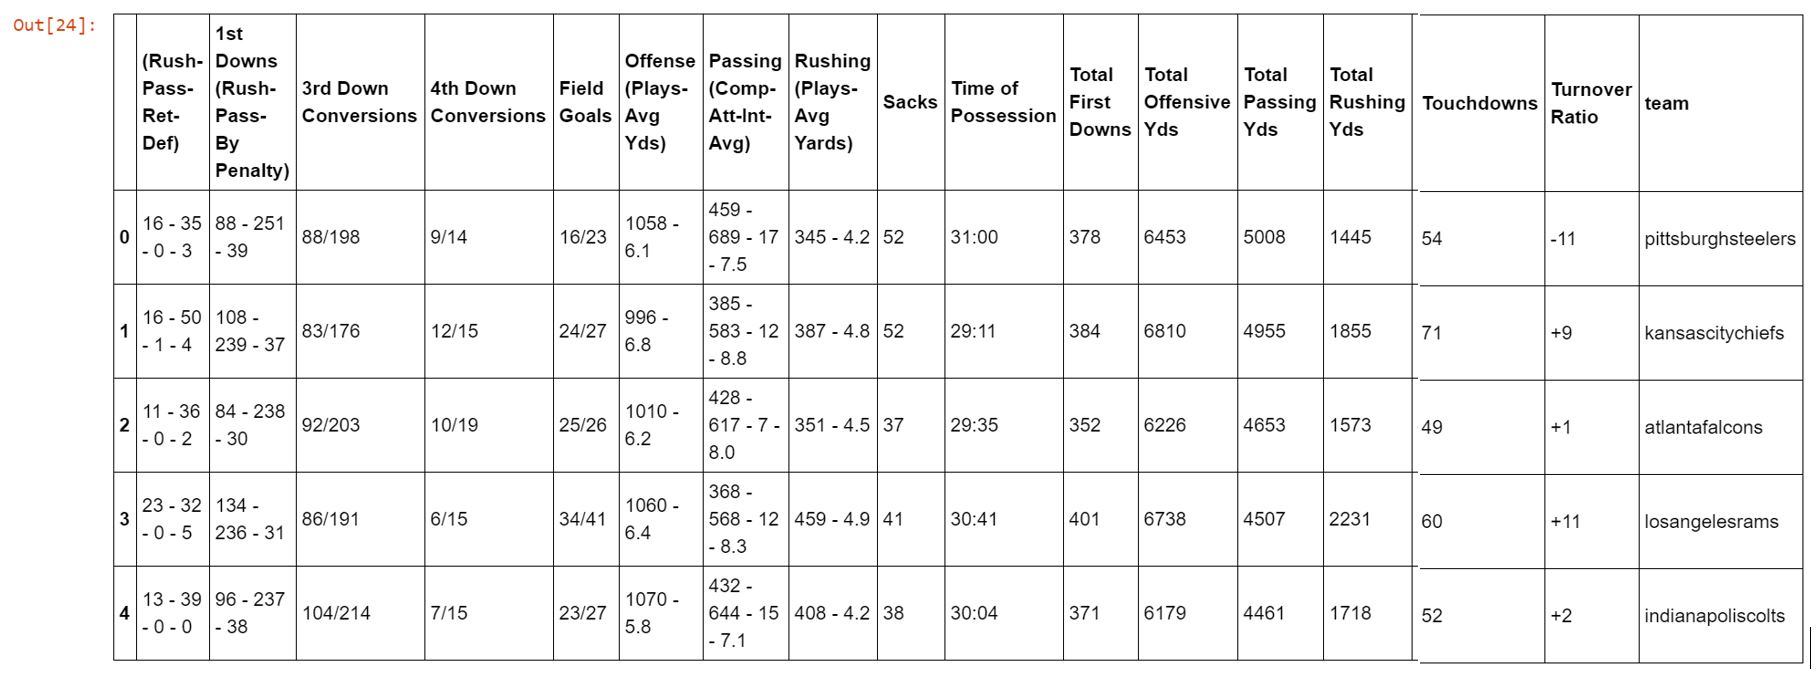

In [1]:
from IPython.display import Image
Image(filename='teamdf.jpg')

## Question 5:
Save the pandas dataframe to a csv file called teamDF. 

In [ ]:
'''YOUR CODE HERE'''